<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%202%20-%20Regression/Section%206%20-%20Polynomial%20Regression/Python/polynomial_regression_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

Verlassen wir nun die Lineare Welt und kommen zur der Nicht-Linearen Regression auch Polynomiale Regression genannt. Der wesentliche Unterschied zur Formel der linearen Regressionen (Simple/Multiple) ist, dass wir nun eine Funktion benötigen, mittels welcher wir eine Kurve in die gerade Line biegen können. 

$y = b_0 + b_1x_1$**$+b_2x_1^2$**

In der Formel sehen wir noch eine Quadrat-Funktion mittels welche wir die Biegung hinbekommen.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
daturl = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%202%20-%20Regression/Section%206%20-%20Polynomial%20Regression/Python/Position_Salaries.csv'
dataset = pd.read_csv(daturl)

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


## Training the Linear Regression model on the whole dataset

Damit wir einen Vergleich zwischen Regression-Modells durchführen können (Was in der Praxis State of the Art ist) wollen wir zuerst ein Lineares Regression-Modell erstellen.

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

Nun erstellen wir ein Poly-Reg Modell.

Nähere Erklärung zu Polynomial Regression siehe [Link](https://online.stat.psu.edu/stat462/node/158/)

In [47]:
# Zuerst werden wir die Features für das Poly-Regression Modell vorbereiten
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2) # Erstellung eines Objekt mit Degree 2 heisst nichts anderes als Quadratisch
pr2 = PolynomialFeatures(degree = 4)
# Wenn wir den Grad (3 oder 4) erhöhen, dann bekommen wir auch ein besseres Resultat, dabei besteht natürlich auch die
# die Gefahr von Overfitting
X_poly = pr.fit_transform(X)
X_poly2 = pr2.fit_transform(X)

# Da wir es immer noch mit einem Linearen Modell zu tun haben, müssen wir jetzt noch
# die oben erstellte Funktion in das bereits bekannte lineare Modell übertragen.
lr2 = LinearRegression()
lr2.fit(X_poly, y)
lr2.fit(X_poly2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

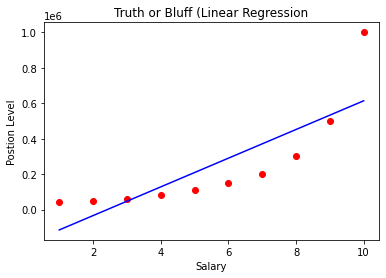

In [24]:
plt.scatter(X,y, color='red')
plt.plot(X, lr.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression')
plt.ylabel('Postion Level')
plt.xlabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

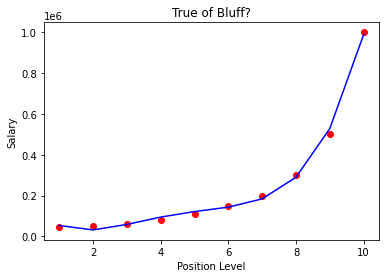

In [25]:
plt.scatter(X,y, color='red')
plt.plot(X,lr2.predict(X_poly), color='blue')
plt.title('True of Bluff?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

Wir sehen im vorherigen Plot, dass die Kurve nicht ganz so optimal zwischen den Datenpunkten verläuft, weshalb wir sie noch mit einem höhren Grad versehen und sie etwas glätten (smoother).

Würden wir hier nur den Grad erhöhen, dann bekämmen wir relative gerade Linien zwischen den Punkten.

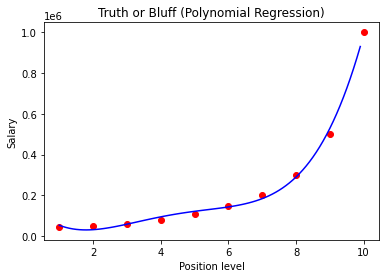

In [40]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lr2.predict(pr2.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Predicting a new result with Linear Regression

Nachfolgend wollen wir mittels der Linearen Regression die Prediction eines einzelnen Wertes (6.5 Jahre Erfahrung) ausfindig machen.

In [42]:
print(lr.predict([[6.5]])) #Die erste eckige Klammer symbolisiert die Zeilen und die zweite Klammer die Spalten
print('Das Resultat ist sehr schlecht, da der Salary von 3300378 doch sehr weitweg der Norm ist. Das lineare Model performed schlecht')


[330378.78787879]
Das Resultat ist sehr schlecht, da der Salary von 3300378 doch sehr weitweg der Norm ist 


## Predicting a new result with Polynomial Regression

Wiederholen wir noch das gleiche Experiment mit der polynominalen Regression.

In [50]:
print(lr2.predict(pr2.fit_transform([[6.5]])))
print('Wir bekommen erneut die Bestätigung, dass das PLR Modell besser performed als das LR-Modell')

[158862.45265155]
Wir bekommen erneut die Bestätigung, dass das PLR Modell besser Performed als das LR-Modell
